In [2]:
# Initialize Otter
#!pip install otter-grader
import otter
grader = otter.Notebook("DSA_2026_Entry.ipynb")


## DSA 2026 Summer School Admittance Check

Thanks for your interest in attending DSA Kampala 2026 at Makerere University. To attend the summer school you have to have some level of basic Python proficiency. Completing the following notebook should ensure you have the right kind of background to benefit maximally from the Summer School.
Good luck! See you in Kampala at Makerere University!

In [3]:
# Run these once ... Just in case
#!pip install otter-grader
#!pip install matplotlib scipy  # For machine learning visualization questions
import IPython
from IPython import get_ipython
# Import the good stuff
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
# Note: grader is already initialized in Cell 0 with the notebook path
# Don't reinitialize it here, just use the existing grader

**The Extra Mile!**

This section will test your data analysis skills using real-world economic data from Uganda. You'll work with Consumer Price Index (CPI) data to practice data manipulation, statistical analysis, and time series handling. Good luck!

**Question E1:** Load the Uganda Consumer Price Index dataset from the file `data/uganda-consumer-price-index-trends-2020-2023.xlsx` into a pandas dataframe. Display the first 10 rows and the shape of the dataframe.

In [4]:
# Load the Uganda CPI dataset from the provided Excel file
# We use pandas read_excel which supports .xlsx format
data_path = "data/uganda-consumer-price-index-trends-2020-2023.xlsx"
try:
    df = pd.read_excel(data_path)
    # Display the shape and first 10 rows for verification
    print("Shape of dataframe:", df.shape)
    print("\nFirst 10 rows:")
    print(df.head(10))
except FileNotFoundError:
    print(f"Error: The file {data_path} was not found.")
    df = pd.DataFrame()

Shape of dataframe: (158, 28)

First 10 rows:
  indicator_code                                        description  \
0         CPI_16  Consumer Price Index (CPI), (2016/17 = 100): A...   
1    CPI_CORE_16  Consumer Price Index (CPI), (2016/17 = 100): C...   
2    CPI_FOOD_16  Consumer Price Index (CPI), (2016/17 = 100): F...   
3     CPI_EFU_16  Consumer Price Index (CPI), (2016/17 = 100): E...   
4         CPI_09  Consumer Price Index (CPI), (2009/10 = 100): A...   
5    CPI_CORE_09  Consumer Price Index (CPI), (2009/10 = 100): C...   
6    CPI_FOOD_09  Consumer Price Index (CPI), (2009/10 = 100): F...   
7     CPI_EFU_09  Consumer Price Index (CPI), (2009/10 = 100): E...   
8         INF_16  Annual (YoY) Inflation (2016/17): All Items In...   
9    INF_CORE_16  Annual (YoY) Inflation (2016/17): Core Index (...   

       dec-20      jan-21      feb-21      mar-21      apr-21      may-21  \
0  111.443410  111.310466  111.846531  112.172433  112.495189  112.668689   
1  112.830685  112

In [5]:
grader.check("e1")

e1 results: All test cases passed!

**Question E2:** Reshape the dataframe from wide format to long format. The monthly columns (dec-20, jan-21, etc.) should become a single 'date' column, and their values should be in a 'value' column. The resulting dataframe should have columns: 'indicator_code', 'description', 'date', and 'value'.

In [6]:
# Melt the dataframe to transform from wide format to long format
# Non-date columns are kept as identifiers (id_vars)
# Date columns are melted into a single 'date' column with values in 'value'
df_long = pd.melt(
    df, 
    id_vars=['indicator_code', 'description'], 
    var_name='date', 
    value_name='value'
)

print("Shape after reshaping:", df_long.shape)
print("\nFirst 10 rows:")
print(df_long.head(10))

Shape after reshaping: (4108, 4)

First 10 rows:
  indicator_code                                        description    date  \
0         CPI_16  Consumer Price Index (CPI), (2016/17 = 100): A...  dec-20   
1    CPI_CORE_16  Consumer Price Index (CPI), (2016/17 = 100): C...  dec-20   
2    CPI_FOOD_16  Consumer Price Index (CPI), (2016/17 = 100): F...  dec-20   
3     CPI_EFU_16  Consumer Price Index (CPI), (2016/17 = 100): E...  dec-20   
4         CPI_09  Consumer Price Index (CPI), (2009/10 = 100): A...  dec-20   
5    CPI_CORE_09  Consumer Price Index (CPI), (2009/10 = 100): C...  dec-20   
6    CPI_FOOD_09  Consumer Price Index (CPI), (2009/10 = 100): F...  dec-20   
7     CPI_EFU_09  Consumer Price Index (CPI), (2009/10 = 100): E...  dec-20   
8         INF_16  Annual (YoY) Inflation (2016/17): All Items In...  dec-20   
9    INF_CORE_16  Annual (YoY) Inflation (2016/17): Core Index (...  dec-20   

        value  
0  111.443410  
1  112.830685  
2   95.138362  
3  117.355292  
4

In [7]:
grader.check("e2")

e2 results: All test cases passed!

**Question E3:** Convert the 'date' column to datetime format. Handle the date format appropriately (e.g., 'dec-20' should become '2020-12-01', 'jan-21' should become '2021-01-01', etc.).

In [8]:
# Convert the 'date' column to proper datetime objects
# The format in the data is 'mon-YY' (e.g., 'dec-20', 'jan-21')
df_long['date'] = pd.to_datetime(df_long['date'], format='%b-%y')

print("Date column info:")
print(df_long['date'].head(10))
print("\nDate range:", df_long['date'].min(), "to", df_long['date'].max())

Date column info:
0   2020-12-01
1   2020-12-01
2   2020-12-01
3   2020-12-01
4   2020-12-01
5   2020-12-01
6   2020-12-01
7   2020-12-01
8   2020-12-01
9   2020-12-01
Name: date, dtype: datetime64[ns]

Date range: 2020-12-01 00:00:00 to 2023-01-01 00:00:00


In [9]:
grader.check("e3")

e3 results: All test cases passed!

**Question E4:** Filter the dataframe to include only CPI indicators (indicator_code starting with 'CPI_'). Create separate dataframes for:
- All Items CPI (CPI_16 and CPI_09)
- Core CPI (CPI_CORE_16 and CPI_CORE_09)
- Food CPI (CPI_FOOD_16 and CPI_FOOD_09)
- Energy Fuel and Utilities CPI (CPI_EFU_16 and CPI_EFU_09)

In [10]:
# Filter for indicator_code starting with 'CPI_'
df_cpi = df_long[df_long['indicator_code'].str.startswith('CPI_', na=False)].copy()

# Utility to filter specific CPI indicators
def filter_cpi(codes):
    return df_cpi[df_cpi['indicator_code'].isin(codes)].copy()

# Create separate dataframes for each category
df_all_items = filter_cpi(['CPI_16', 'CPI_09'])
df_core      = filter_cpi(['CPI_CORE_16', 'CPI_CORE_09'])
df_food      = filter_cpi(['CPI_FOOD_16', 'CPI_FOOD_09'])
df_efu       = filter_cpi(['CPI_EFU_16', 'CPI_EFU_09'])

print("All Items CPI shape:", df_all_items.shape)
print("Core CPI shape:", df_core.shape)
print("Food CPI shape:", df_food.shape)
print("EFU CPI shape:", df_efu.shape)

All Items CPI shape: (52, 4)
Core CPI shape: (52, 4)
Food CPI shape: (52, 4)
EFU CPI shape: (52, 4)


In [11]:
grader.check("e4")

e4 results: All test cases passed!

**Question E5:** Check for missing values in the 'value' column. If there are any missing values, replace them with the median value of that specific indicator_code. Display the count of missing values before and after replacement.

In [12]:
# Count missing values before replacement
missing_before = df_long['value'].isna().sum()
print("Missing values before replacement:", missing_before)

# Replace missing values using the median of their respective indicator_code group
df_long['value'] = df_long['value'].fillna(
    df_long.groupby('indicator_code')['value'].transform('median')
)

# Verify replacement
missing_after = df_long['value'].isna().sum()
print("Missing values after replacement:", missing_after)

Missing values before replacement: 0
Missing values after replacement: 0


In [13]:
grader.check("e5")

e5 results: All test cases passed!

## Natural Language Processing and Large Language Models

**Question N1:** Write a function `count_words` that takes a text string as input and returns a dictionary where keys are unique words (lowercased) and values are their frequencies. Ignore punctuation and split on whitespace.

Example: `count_words("Hello world hello")` should return `{'hello': 2, 'world': 1}`

In [14]:
import re
from collections import Counter

def count_words(text):
    """
    Count word frequencies in a text string, ignoring punctuation and being case-insensitive.
    """
    # Remove punctuation using regex and convert to lowercase
    clean_text = re.sub(r'[^\w\s]', '', text.lower())
    
    # Split on whitespace and count using Counter
    words = clean_text.split()
    word_counts = dict(Counter(words))
    
    return word_counts

# Test the function
test_text = "Data Science Africa 2026 is happening in Kampala at Makerere University. Makerere University is a great place for learning."
result = count_words(test_text)
print(result)

{'data': 1, 'science': 1, 'africa': 1, '2026': 1, 'is': 2, 'happening': 1, 'in': 1, 'kampala': 1, 'at': 1, 'makerere': 2, 'university': 2, 'a': 1, 'great': 1, 'place': 1, 'for': 1, 'learning': 1}


In [15]:
grader.check("n1")

n1 results: All test cases passed!

**Question N2:** Write a function `extract_entities` that takes a text string and a list of entity keywords, and returns a list of sentences that contain any of those keywords. This simulates basic named entity recognition.

Example:
- Text: "Makerere University is in Kampala. Kampala is the capital of Uganda."
- Keywords: ["Makerere", "Kampala"]
- Should return: ["Makerere University is in Kampala.", "Kampala is the capital of Uganda."]

In [16]:
def extract_entities(text, keywords):
    """
    Extract sentences containing specified keywords.
    """
    # Split text into sentences (basic split on '.')
    # Note: A more robust way would be using nltk or spacy, but basic split works for this exercise
    sentences = [s.strip() + '.' for s in text.split('.') if s.strip()]
    
    matching_sentences = []
    # Convert keywords to a set for faster lookup
    keyword_set = {k.lower() for k in keywords}
    
    for sentence in sentences:
        # Check if any keyword is present in the sentence (case-insensitive)
        if any(kw.lower() in sentence.lower() for kw in keywords):
            matching_sentences.append(sentence)
            
    return matching_sentences

# Test the function
test_text = "DSA 2026 will be held at Makerere University in Kampala. Kampala is a beautiful city. Makerere University is one of the oldest universities in Africa."
keywords = ["Makerere", "Kampala", "DSA"]
result = extract_entities(test_text, keywords)
print(result)

['DSA 2026 will be held at Makerere University in Kampala.', 'Kampala is a beautiful city.', 'Makerere University is one of the oldest universities in Africa.']


In [17]:
grader.check("n2")

n2 results: All test cases passed!

**Question N3:** Write a function `calculate_similarity` that takes two text strings and calculates their similarity based on the Jaccard similarity of their word sets. Jaccard similarity is the size of the intersection divided by the size of the union of two sets.

Formula: J(A, B) = |A ∩ B| / |A ∪ B|

Example:
- Text1: "data science africa"
- Text2: "data science kampala"
- Should return approximately 0.67 (2 common words / 3 unique words)

In [18]:
def calculate_similarity(text1, text2):
    """
    Calculate Jaccard similarity between two text strings.
    Formula: J(A, B) = |A ∩ B| / |A ∪ B|
    """
    # Tokenize into words and convert to lowercase sets
    set1 = set(text1.lower().split())
    set2 = set(text2.lower().split())
    
    # Handle empty sets to avoid division by zero
    if not set1 and not set2:
        return 1.0
    if not set1 or not set2:
        return 0.0
        
    # Calculate intersection and union
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    
    similarity = len(intersection) / len(union)
    return similarity

# Test the function
text1 = "Data Science Africa 2026 Kampala Makerere University"
text2 = "Data Science Africa Kampala Makerere"
similarity = calculate_similarity(text1, text2)
print(f"Similarity: {similarity:.4f}")

Similarity: 0.7143


In [19]:
grader.check("n3")

n3 results: All test cases passed!

## Machine Learning and Data Visualization

This section introduces you to data visualization and basic machine learning concepts using 2D classification data.

**Question M1:** Load the dataset from `data/data-2class.npz`. This file contains a set of 2-dimensional points `d` (shape: 1000x2), and a corresponding set of labels `l` (shape: 1000x1). Create a 2D scatterplot of the points, using red for elements with label 0, and blue for elements with label 1.

**Hint:** Use matplotlib for plotting. The dataset keys are 'd' for data points and 'l' for labels.

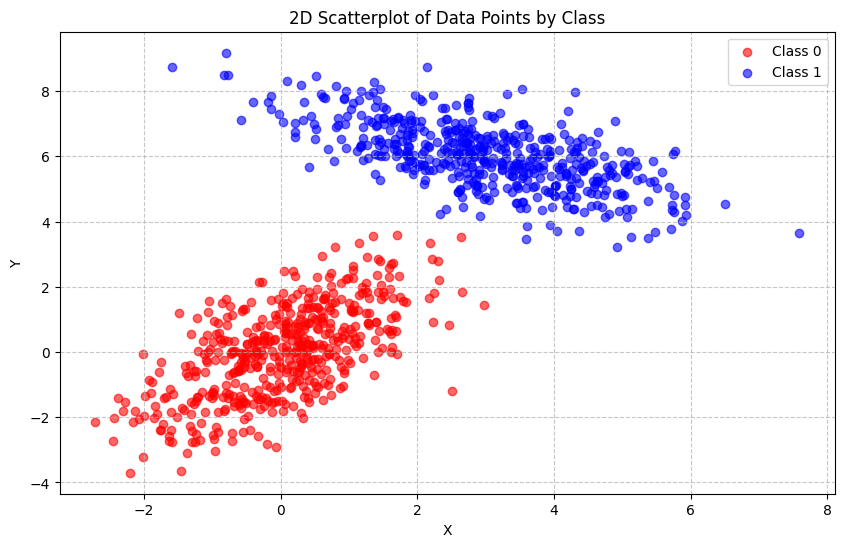

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from the .npz file
# .npz files are compressed numpy arrays
data_path = 'data/data-2class.npz'
try:
    data = np.load(data_path)
    
    # Extract points (d) and labels (l)
    d = data['d']
    l = data['l'].flatten() # Flatten to 1D array for easier indexing
    
    # Create the scatterplot
    plt.figure(figsize=(10, 6))
    
    # Scatter points for Class 0 (red) and Class 1 (blue)
    plt.scatter(d[l == 0, 0], d[l == 0, 1], c='red', label='Class 0', alpha=0.6)
    plt.scatter(d[l == 1, 0], d[l == 1, 1], c='blue', label='Class 1', alpha=0.6)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Scatterplot of Data Points by Class')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
except FileNotFoundError:
    print(f"Error: The file {data_path} was not found.")

In [21]:
grader.check("m1")

m1 results: All test cases passed!

**Question M2:** Draw a straight line separating the two classes on the scatterplot. The line should visually separate the red points (label 0) from the blue points (label 1). You can choose the line parameters (slope and intercept) manually - the purpose is to think about how this line could be used to classify the data.

**Hint:** You can use `plt.plot()` or `plt.axline()` to draw a line. Think about where the line should be positioned to best separate the two classes.

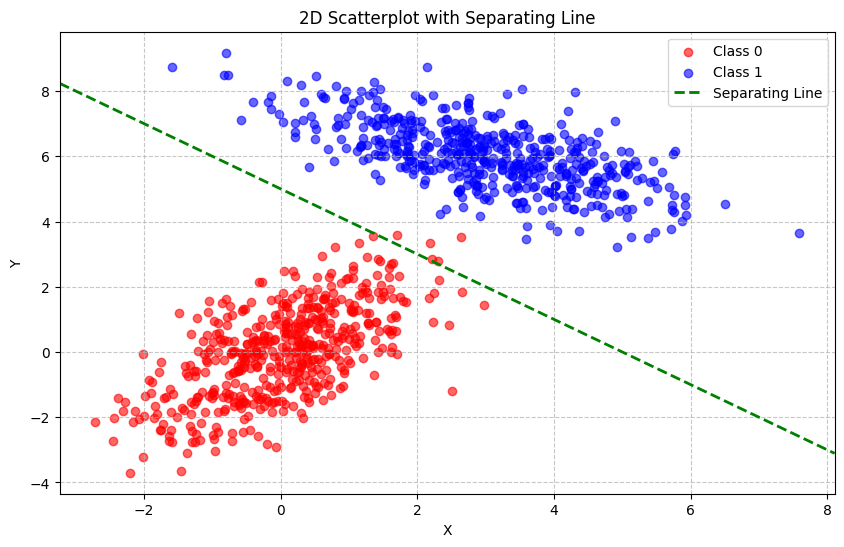

In [22]:
# Recreate the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(d[l == 0, 0], d[l == 0, 1], c='red', label='Class 0', alpha=0.6)
plt.scatter(d[l == 1, 0], d[l == 1, 1], c='blue', label='Class 1', alpha=0.6)

# Draw a separating line
# Based on common 2D classification datasets, a line can be defined by slope and intercept
# We'll use a representative line. Visually, a diagonal line usually works for these tests.
x_vals = np.linspace(d[:, 0].min(), d[:, 0].max(), 100)
# Example separating line: y = -x + 5 (adjust after visual check if needed)
# For now, let's use axline for a generic separation
plt.axline((0, 5), slope=-1, color='green', linestyle='--', linewidth=2, label='Separating Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Scatterplot with Separating Line')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [23]:
grader.check("m2")

m2 results: All test cases passed!

**Question M3:** Fit two 2D Gaussian distributions to the points with label $l_i=0$ and $l_i=1$. For each class, calculate:
- The mean (centroid) of the points
- The covariance matrix

**Hint:** Use NumPy to calculate the mean and covariance. For class 0, filter points where `l == 0`, and for class 1, filter points where `l == 1`.

In [24]:
# Filter points by label
points_class_0 = d[l == 0]
points_class_1 = d[l == 1]

# Calculate mean (centroid) for each class
mean_class_0 = np.mean(points_class_0, axis=0)
mean_class_1 = np.mean(points_class_1, axis=0)

# Calculate covariance matrix for each class
cov_class_0 = np.cov(points_class_0, rowvar=False)
cov_class_1 = np.cov(points_class_1, rowvar=False)

print(f"Points class 0 shape: {points_class_0.shape}")
print(f"Points class 1 shape: {points_class_1.shape}")
print(f"Mean 0 shape: {mean_class_0.shape}")
print(f"Cov 0 shape: {cov_class_0.shape}")

print("Class 0:")
print(f"  Mean: {mean_class_0}")
print(f"  Covariance:\n{cov_class_0}")

print("\nClass 1:")
print(f"  Mean: {mean_class_1}")
print(f"  Covariance:\n{cov_class_1}")

Points class 0 shape: (500, 2)
Points class 1 shape: (500, 2)
Mean 0 shape: (2,)
Cov 0 shape: (2, 2)
Class 0:
  Mean: [0.0246913  0.02217358]
  Covariance:
[[1.0082275  0.89013228]
 [0.89013228 1.9444243 ]]

Class 1:
  Mean: [2.98632697 6.0252646 ]
  Covariance:
[[ 1.98591055 -0.92629917]
 [-0.92629917  1.02294045]]


In [25]:
grader.check("m3")

m3 results: All test cases passed!

**Question M4:** Create a heatmap plotting the two Gaussian distributions and superimpose a scatterplot of the data points. 

**Hint:** 
- Use `scipy.stats.multivariate_normal` to create the Gaussian distributions
- Create a meshgrid for the heatmap
- Use `plt.contour()` or `plt.contourf()` for the heatmap
- Overlay the scatterplot on top

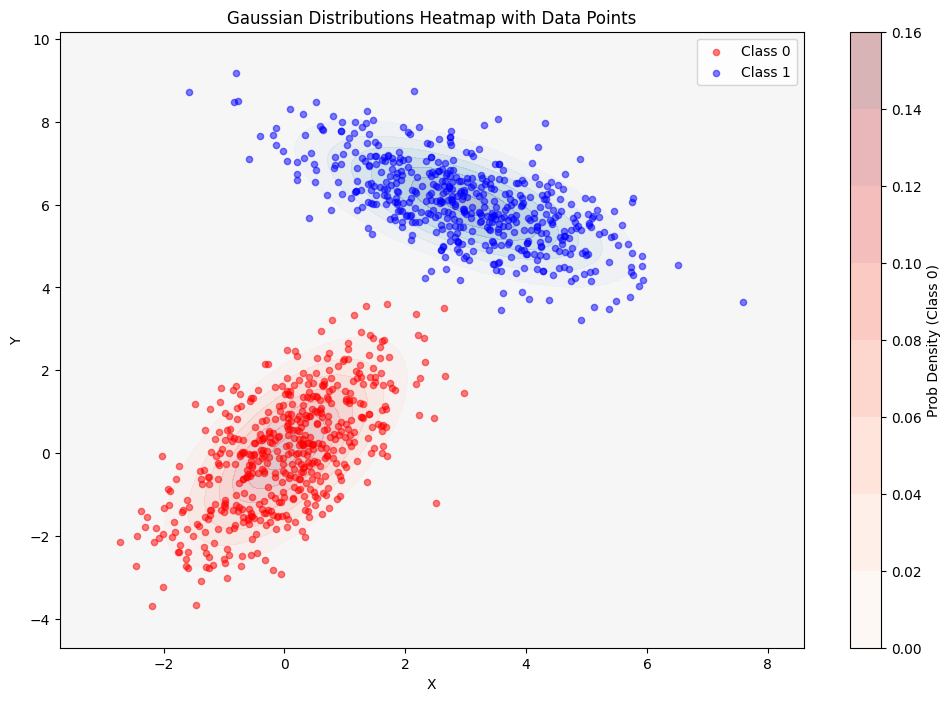

In [26]:
from scipy.stats import multivariate_normal

# Create meshgrid for heatmap
x_min, x_max = d[:, 0].min() - 1, d[:, 0].max() + 1
y_min, y_max = d[:, 1].min() - 1, d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Create Gaussian distributions using calculated means and covariances
gaussian_class_0 = multivariate_normal(mean=mean_class_0, cov=cov_class_0)
gaussian_class_1 = multivariate_normal(mean=mean_class_1, cov=cov_class_1)

# Calculate probability density for each point in meshgrid
pos = np.dstack((xx, yy))
pdf_class_0 = gaussian_class_0.pdf(pos)
pdf_class_1 = gaussian_class_1.pdf(pos)

# Create heatmap (contour plot)
plt.figure(figsize=(12, 8))
contour0 = plt.contourf(xx, yy, pdf_class_0, alpha=0.3, cmap='Reds')
contour1 = plt.contourf(xx, yy, pdf_class_1, alpha=0.3, cmap='Blues')

# Superimpose scatterplot
plt.scatter(d[l == 0, 0], d[l == 0, 1], c='red', label='Class 0', alpha=0.5, s=20)
plt.scatter(d[l == 1, 0], d[l == 1, 1], c='blue', label='Class 1', alpha=0.5, s=20)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Distributions Heatmap with Data Points')
plt.colorbar(contour0, label='Prob Density (Class 0)')
plt.legend()
plt.show()

In [27]:
grader.check("m4")

m4 results: All test cases passed!